In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import Model, Input, regularizers, utils
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing import image

import glob
from tqdm import tqdm
import os
import random
from torch.utils.data import Dataset
from PIL import Image
import torchvision.transforms as transforms
from torch.nn import functional as F
import torch
import tensorflow as tf
from tensorflow import keras

C:\Users\soura\anaconda3\envs\machine-learning\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
root = 'D:/Encoders/dataset/testA/'
face_images = glob.glob(root + "*.*")

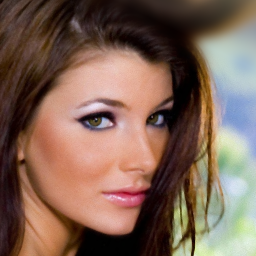

In [3]:
img = utils.load_img(face_images[0])
img

In [4]:
all_images = []

for i in tqdm(face_images[:100]):
    img = utils.load_img(i)
    img = utils.img_to_array(img)
    img = img/255.0
    all_images.append(img)

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 248.82it/s]


In [5]:
all_images = np.array(all_images)

# split data into train and validation data
train_x, test_x = train_test_split(all_images, random_state=32, test_size=0.1)

In [22]:
Input_img = Input(shape=(256, 256, 3))  
    
#encoding architecture
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(Input_img)

x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)

x2 = MaxPool2D( (2, 2))(x2)

x3 = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)

x4 = Conv2D(32, (3, 3), activation='relu', padding='same')(x3)

x4 = MaxPool2D( (2, 2))(x4)

encoded = Conv2D(16, (3, 3), activation='relu', padding='same')(x4)


# decoding architecture

x5 = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)

x5 = UpSampling2D((2, 2))(x5)

x6 = Conv2D(32, (3, 3), activation='relu', padding='same')(x5)

x7 = Conv2D(64, (3, 3), activation='relu', padding='same')(x6)
x7 = UpSampling2D((2, 2))(x7)

x8 = Conv2D(128, (3, 3), activation='relu', padding='same')(x7)

x9 = Conv2D(256, (3, 3), activation='relu', padding='same')(x8)

decoded = Conv2D(3, (3, 3), padding='same')(x9)



autoencoder = Model(Input_img, decoded)

autoencoder.compile(optimizer='adam', loss='mse')

In [23]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_22 (Conv2D)          (None, 256, 256, 256)     7168      
                                                                 
 conv2d_23 (Conv2D)          (None, 256, 256, 128)     295040    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 128, 128, 128)    0         
 2D)                                                             
                                                                 
 conv2d_24 (Conv2D)          (None, 128, 128, 64)      73792     
                                                                 
 conv2d_25 (Conv2D)          (None, 128, 128, 32)      18464     
                                                           

In [24]:
checkpoint_filepath = './checkpoint/checkpoint_{epoch:02d}-{val_loss:06f}.hdf5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,)
a_e = autoencoder.fit(train_x, train_x,
            epochs=100,
            batch_size=5,
            shuffle=True,
            callbacks=[model_checkpoint_callback],
            validation_data=(test_x,test_x))

Epoch 1/100
18/18 [==============================] - 14s 727ms/step - loss: 0.1448 - val_loss: 0.0701
Epoch 2/100
18/18 [==============================] - 13s 713ms/step - loss: 0.0290 - val_loss: 0.0143
Epoch 3/100
18/18 [==============================] - 13s 708ms/step - loss: 0.0121 - val_loss: 0.0097
Epoch 4/100
18/18 [==============================] - 13s 723ms/step - loss: 0.0095 - val_loss: 0.0100
Epoch 5/100
18/18 [==============================] - 13s 722ms/step - loss: 0.0090 - val_loss: 0.0069
Epoch 6/100
18/18 [==============================] - 13s 740ms/step - loss: 0.0066 - val_loss: 0.0076
Epoch 7/100
18/18 [==============================] - 14s 748ms/step - loss: 0.0058 - val_loss: 0.0046
Epoch 8/100
18/18 [==============================] - 14s 762ms/step - loss: 0.0044 - val_loss: 0.0045
Epoch 9/100
18/18 [==============================] - 14s 748ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 10/100
18/18 [==============================] - 14s 748ms/step - loss: 0.003

Epoch 81/100
18/18 [==============================] - 13s 744ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 82/100
18/18 [==============================] - 13s 742ms/step - loss: 0.0020 - val_loss: 0.0022
Epoch 83/100
18/18 [==============================] - 13s 727ms/step - loss: 0.0022 - val_loss: 0.0023
Epoch 84/100
18/18 [==============================] - 13s 737ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 85/100
18/18 [==============================] - 13s 734ms/step - loss: 0.0022 - val_loss: 0.0025
Epoch 86/100
18/18 [==============================] - 13s 729ms/step - loss: 0.0024 - val_loss: 0.0029
Epoch 87/100
18/18 [==============================] - 13s 727ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 88/100
18/18 [==============================] - 13s 742ms/step - loss: 0.0022 - val_loss: 0.0024
Epoch 89/100
18/18 [==============================] - 13s 744ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 90/100
18/18 [==============================] - 13s 741ms/step - lo

In [7]:
autoencoder = keras.models.load_model("./checkpoint/best.hdf5")

In [8]:
predictions = autoencoder.predict(test_x,batch_size=5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


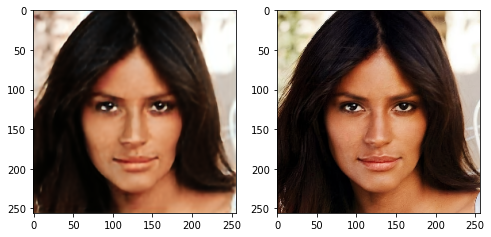

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


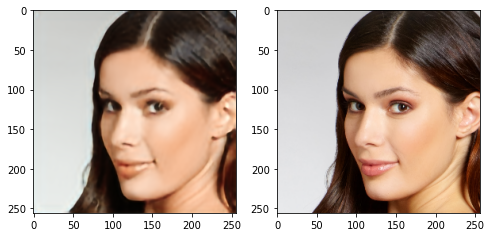

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


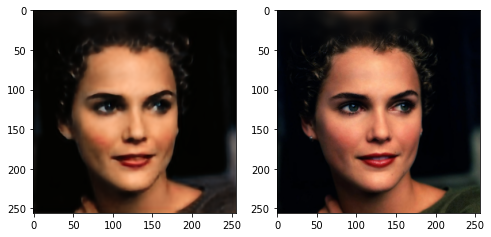

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


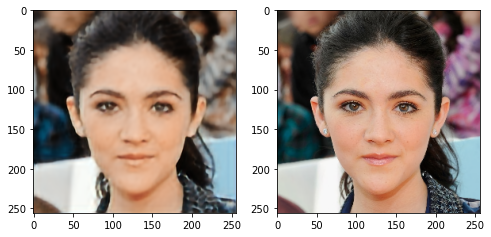

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


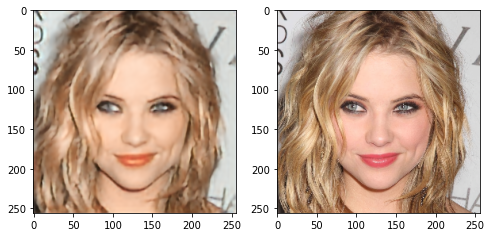

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


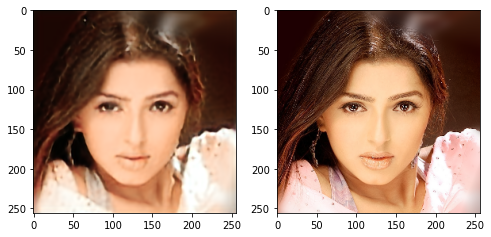

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


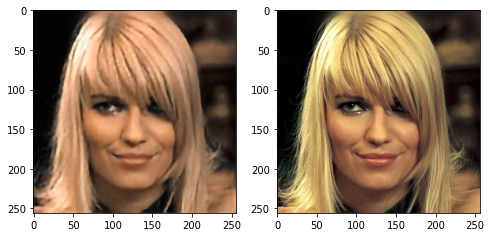

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


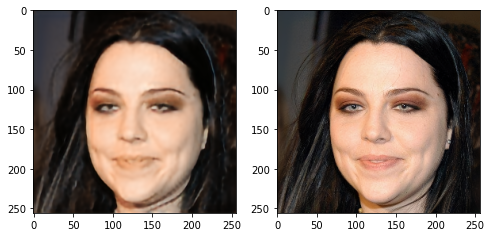

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


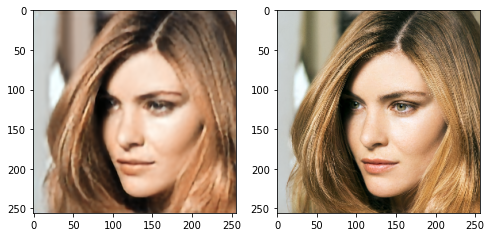

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


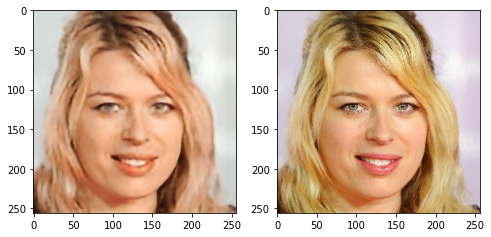

In [9]:
for i in range(len(predictions)):
    w = 10
    h = 10
    fig = plt.figure(figsize=(8, 8))
    columns = 2
    rows = 1
    fig.add_subplot(rows, columns, 1)
    plt.imshow(predictions[i])
    fig.add_subplot(rows, columns, 2)
    plt.imshow(test_x[i])
    plt.show()